In [105]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import color_sequences as cs
import glob

YEAR = '2017'

In [106]:
paths = glob.glob(f'data\\{YEAR}\\*.csv')
data = pd.concat((pd.read_csv(f) for f in paths), ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          953 non-null    object 
 1   Authors                 868 non-null    object 
 2   Author Affiliations     868 non-null    object 
 3   Publication Title       953 non-null    object 
 4   Date Added To Xplore    953 non-null    object 
 5   Publication Year        953 non-null    int64  
 6   Volume                  953 non-null    int64  
 7   Issue                   953 non-null    int64  
 8   Start Page              953 non-null    object 
 9   End Page                953 non-null    object 
 10  Abstract                953 non-null    object 
 11  ISSN                    953 non-null    object 
 12  ISBNs                   0 non-null      float64
 13  DOI                     953 non-null    object 
 14  Funding Information     602 non-null    ob

In [107]:
data.dropna(how='all', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          953 non-null    object 
 1   Authors                 868 non-null    object 
 2   Author Affiliations     868 non-null    object 
 3   Publication Title       953 non-null    object 
 4   Date Added To Xplore    953 non-null    object 
 5   Publication Year        953 non-null    int64  
 6   Volume                  953 non-null    int64  
 7   Issue                   953 non-null    int64  
 8   Start Page              953 non-null    object 
 9   End Page                953 non-null    object 
 10  Abstract                953 non-null    object 
 11  ISSN                    953 non-null    object 
 12  DOI                     953 non-null    object 
 13  Funding Information     602 non-null    object 
 14  PDF Link                953 non-null    ob

In [108]:
data = data[['Authors', 'Author Affiliations', 'Publication Year', 'Funding Information', 'Author Keywords', 'IEEE Terms']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              868 non-null    object
 1   Author Affiliations  868 non-null    object
 2   Publication Year     953 non-null    int64 
 3   Funding Information  602 non-null    object
 4   Author Keywords      859 non-null    object
 5   IEEE Terms           879 non-null    object
dtypes: int64(1), object(5)
memory usage: 44.8+ KB


In [109]:
data.dropna(subset=['Authors', 'Author Affiliations'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              868 non-null    object
 1   Author Affiliations  868 non-null    object
 2   Publication Year     868 non-null    int64 
 3   Funding Information  602 non-null    object
 4   Author Keywords      859 non-null    object
 5   IEEE Terms           866 non-null    object
dtypes: int64(1), object(5)
memory usage: 40.8+ KB


In [110]:
data.to_csv(f'data\\{YEAR}\\aggregate\\combined.csv', encoding='utf-8', index=False)
data.head(5)

,Authors,Author Affiliations,Publication Year,Funding Information,Author Keywords,IEEE Terms
0,D. Erricolo,Department of Electrical and Computer Engineer...,2017,NaN,NaN,NaN
1,S. Zhang; G. F. Pedersen,"Antennas, Propagation and Radio Networking Sec...",2017,Innovationsfonden Denmark project of “Intellig...,Coupled microstrip resonator;endfire radiation...,Wideband;Microstrip resonators;Broadband anten...
2,U. Beaskoetxea; S. Maci; M. Navarro-Cía; M. Be...,"Antennas Group-TERALAB, Universidad Pública de...",2017,Spanish Government(grant numbers:TEC2014-51902...,Bull’s-Eye (BE) antenna;corrugated surface;lea...,Mathematical model;Optical surface waves;Surfa...
3,R. A. C. Baelemans; A. T. Sutinjo; P. J. Hall;...,International Centre for Radio Astronomy Resea...,2017,NaN,Antenna theory;modeling;polarimetry;polarizati...,Dipole antennas;Closed-form solutions;Phased a...
4,J. Wang; Q. Liu; L. Zhu,"Ministerial Key Laboratory of JGMT, Nanjing Un...",2017,National Natural Science Foundation of China(g...,Differential-fed;shorting posts;triangular pat...,Bandwidth;Manganese;Probes;Patch antennas;Geom...


In [111]:
countries = []

# with open('auth_aff.txt', 'w', encoding='utf-8') as f:
largest = [0, 0]
for i in range(data.shape[0]):
    authors = data['Authors'][i].split('; ')
    affiliations = data['Author Affiliations'][i].split('; ')
    largest = [max([largest[0], len(authors)]), i if largest[0] < len(authors) else largest[1]]
    if len(authors) != len(affiliations):
        print(authors, affiliations, sep='\n')
        print(len(authors), len(affiliations))
    for author, aff in zip(authors, affiliations, strict=True):
        # f.write(f'{author}: {aff}\n')
        if aff == 'NA':
            # pass
            print(author)
        if aff.split(', ')[-1] in ('138632', 'Ministry of Industry and Information Technology'):
            print(f'{author}: {aff}')
        countries.append(aff.split(', ')[-1])

L. C. Ong: Institute for Infocomm Research, Agency for Science, Technology & Research, Singapore, 138632
J. Wang: Ministry of Industry and Information Technology
B. Li: Ministry of Industry and Information Technology


In [112]:
south_korea = ('Republic of Korea', 'Korea', 'KR',)
uae = ('United Arab Emirates',)
turkey = ('Türkiye', 'Türkey', 'TR',)
hong_kong = ('Hong Kong SAR', 'Hong Kong SAR China', 'HK', 'Hong Kong.', 'Hong kong')
the_netherlands = ('Netherlands', 'The Netherland', 'NL',)
sar_china = ('SAR',)
uk = ('U.K', 'UK', 'United Kingdom', 'WC1E 6BT', 'GB', )
china = ('China,', "People's Republic of China", 'P. R. China', 'China.', 'Fuzhou', 'Shanxi', 'CN', 'Xi’an', 'Beijing', 'Chongqing University', 'Ministry of Industry and Information Technology')
czechia = ('the Czech Republic', 'Czechia',)
usa = ('USA.', 'NC', 'NM', 'WI', 'CA', 'VA', 'United States', 'Princeton University', 'Zipreel Inc.', 'Berkeley', 'Massachusetts Institute of Technology', 'US',)
italy = ('Italy.', 'IT',)
macau = ('Macao',)
singapore = ('Nanyang Technological University', 'SG', '138632', )
canada = ('Irdeto Canada',)
taiwan = ('ROC', 'R.O.C', 'R.O.C.')
lebanon = ('Louaize',)
ireland = ('Antenna High Frequency Research Centre',)
spain = ('Universidad de Oviedo', 'ES',)
belgium = ('Louvain-la-Neuve', 'BE')
australia = ('AU',)
serbia = ('RS',)
algeria = ('Algérie',)
india = ('IN', 'Karnataka', )
south_africa = ('ZA',)
thailand = ('TH',)
france = ('FR',)
finland = ('FI',)
japan = ('JP',)
iran = ('IR',)
germany = ('DE',)
denmark = ('DK', )
ivory_coast = ('Cäte d’Ivoire')
israel = ('Beersheba',)

In [113]:
countries = pd.Series(countries, dtype=str)
countries = countries.replace(south_korea, 'South Korea')
countries = countries.replace(uae, 'UAE')
countries = countries.replace(turkey, 'Turkey')
countries = countries.replace(hong_kong, 'Hong Kong')
countries = countries.replace(the_netherlands, 'The Netherlands')
countries = countries.replace(sar_china, 'SAR China')
countries = countries.replace(uk, 'U.K.')
countries = countries.replace(china, 'China')
countries = countries.replace(czechia, 'Czech Republic')
countries = countries.replace(usa, 'USA')
countries = countries.replace(italy, 'Italy')
countries = countries.replace(macau, 'Macau')
countries = countries.replace(singapore, 'Singapore')
countries = countries.replace(canada, 'Canada')
countries = countries.replace(taiwan, 'Taiwan')
countries = countries.replace(lebanon, 'Lebanon')
countries = countries.replace(ireland, 'Ireland')
countries = countries.replace(spain, 'Spain')
countries = countries.replace(belgium, 'Belgium')
countries = countries.replace(australia, 'Australia')
countries = countries.replace(serbia, 'Serbia')
countries = countries.replace(algeria, 'Algeria')
countries = countries.replace(india, 'India')
countries = countries.replace(south_africa, 'South Africa')
countries = countries.replace(thailand, 'Thailand')
countries = countries.replace(france, 'France')
countries = countries.replace(finland, 'Finland')
countries = countries.replace(japan, 'Japan')
countries = countries.replace(iran, 'Iran')
countries = countries.replace(germany, 'Germany')
countries = countries.replace(denmark, 'Denmark')
countries = countries.replace(ivory_coast, 'Ivory Coast')
countries = countries.replace(israel, 'Israel')
print(countries.info())
countries = countries[countries != 'NA']
print(countries.info())
counts = countries.value_counts()
# counts = counts[counts >= 10]
print(counts)
labels = list(counts.keys())
values = list(counts.values)
counts.to_csv('look.csv')

<class 'pandas.core.series.Series'>
RangeIndex: 3251 entries, 0 to 3250
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
3251 non-null   object
dtypes: object(1)
memory usage: 25.5+ KB
None
<class 'pandas.core.series.Series'>
Index: 3251 entries, 0 to 3250
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
3251 non-null   object
dtypes: object(1)
memory usage: 50.8+ KB
None
China          1028
USA             438
U.K.            206
France          138
Canada          119
               ... 
Rwanda            1
Austria           1
Iraq              1
Philippines       1
Bolivia           1
Name: count, Length: 63, dtype: int64


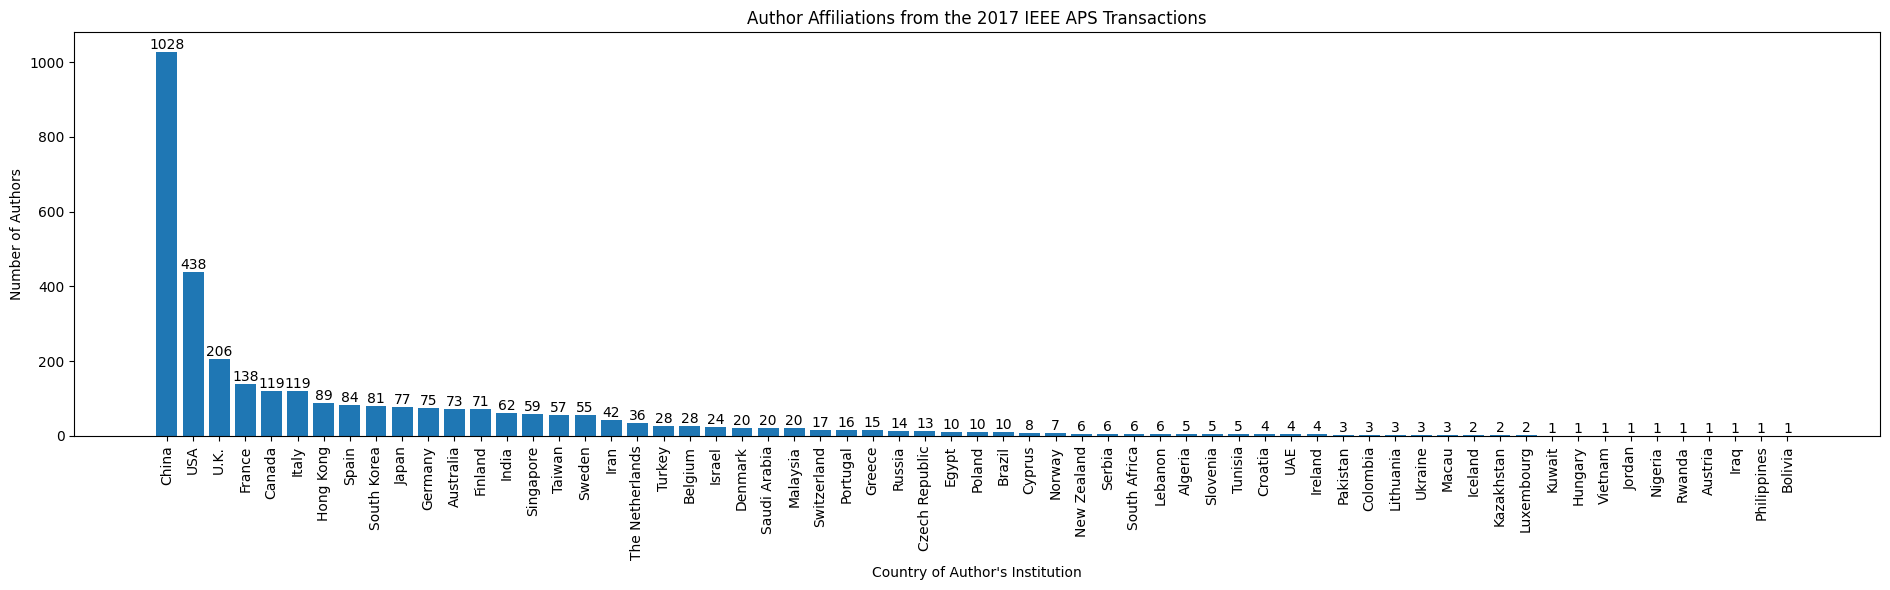

In [114]:
fig, ax = plt.subplots(figsize=(19, 6))
bar_cont = ax.bar(labels, values)
# ax.set(ylim=(0, 1999))
plt.xlabel('Country of Author\'s Institution')
plt.ylabel('Number of Authors')
plt.title(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.xticks(rotation=90)
ax.bar_label(bar_cont)
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_by_country.png', bbox_inches='tight')
plt.show()

In [115]:
super_counts = counts[counts >= 75]
full = counts.sum()
filtered = super_counts.sum()

super_counts['All Other Countries'] = full - filtered

labels = list(super_counts.keys())
values = list(super_counts.values)


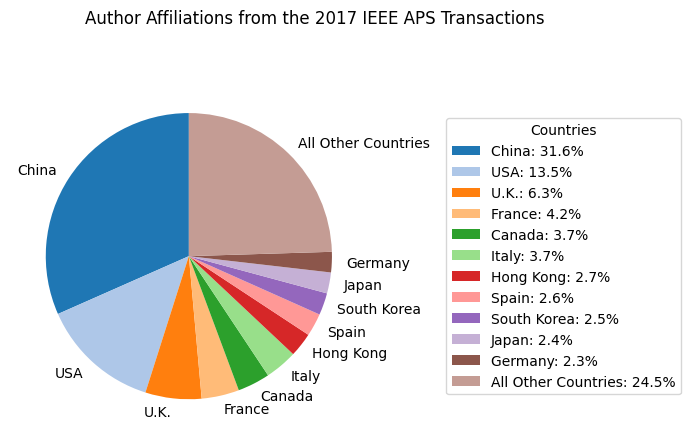

In [116]:

fig, ax = plt.subplots()
wedges, texts = ax.pie(values, labels=labels, startangle=90, colors=cs['tab20'])
percent = [f'{label}: {value/sum(values) * 100:.1f}%' for label, value in zip(labels, values, strict=True)]
ax.legend(wedges, percent, title='Countries', loc='center left', bbox_to_anchor=(1.2, 0, 0.5, 1))
fig.suptitle(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_PIE.png', bbox_inches='tight')
plt.show()